In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### analisi x KNN

In [21]:
suggested = pd.read_csv('compiled_schedule_suggested.csv')
sample = pd.read_csv('compiled_sample_schedule.csv')
#sample = sample[sample.quality > 69]
perc_quality = [60,65,70,75,80,85,90,95]

In [22]:
suggested.algorithm.unique()

array(['DecisionTree', 'LogisticRegression', 'KNN', 'RandomForest',
       'AdaBoost', 'SVC'], dtype=object)

In [23]:
suggested_completeness = suggested[(suggested.dimension_1 == 'accuracy') & (suggested.algorithm == 'SVC')]
suggested_completeness

,dimension_1,dimension_2,imp_1,imp_2,imp_3,imp_col_1,imp_col_2,imp_col_3,od_1,od_2,...,od_imp_2,od_imp_3,od_imp_col_1,od_imp_col_2,od_imp_col_3,quality,algorithm,perf_dirty,perf_1,perf_2
30,accuracy,completeness,impute_knn,impute_knn,impute_knn,Temperature,Precipitation,AtmosphericPressure,IQR,ZSB,...,impute_knn,impute_knn,Temperature,Precipitation,AtmosphericPressure,70,SVC,0.209098,0.304073,0.486908
31,accuracy,completeness,impute_knn,impute_knn,impute_knn,Temperature,Precipitation,AtmosphericPressure,IQR,ZSB,...,impute_knn,impute_knn,Temperature,AtmosphericPressure,Precipitation,70,SVC,0.199698,0.257345,0.381441
32,accuracy,completeness,impute_knn,impute_knn,impute_knn,Temperature,Precipitation,AtmosphericPressure,IQR,ZSB,...,impute_knn,impute_knn,Precipitation,Temperature,AtmosphericPressure,70,SVC,0.191635,0.329198,0.379268
33,accuracy,completeness,impute_knn,impute_knn,impute_knn,Temperature,Precipitation,AtmosphericPressure,IQR,ZSB,...,impute_knn,impute_knn,Precipitation,AtmosphericPressure,Temperature,70,SVC,0.193244,0.315379,0.402164
34,accuracy,completeness,impute_knn,impute_knn,impute_knn,Temperature,Precipitation,AtmosphericPressure,IQR,ZSB,...,impute_knn,impute_knn,AtmosphericPressure,Temperature,Precipitation,70,SVC,0.175000,0.309454,0.356099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,accuracy,completeness,impute_knn,impute_knn,impute_knn,AtmosphericPressure,Precipitation,Temperature,IQR,ZSB,...,impute_knn,impute_knn,Temperature,AtmosphericPressure,Precipitation,95,SVC,0.346663,0.549849,0.629364
1292,accuracy,completeness,impute_knn,impute_knn,impute_knn,AtmosphericPressure,Precipitation,Temperature,IQR,ZSB,...,impute_knn,impute_knn,Precipitation,Temperature,AtmosphericPressure,95,SVC,0.175179,0.608985,0.696863
1293,accuracy,completeness,impute_knn,impute_knn,impute_knn,AtmosphericPressure,Precipitation,Temperature,IQR,ZSB,...,impute_knn,impute_knn,Precipitation,AtmosphericPressure,Temperature,95,SVC,0.330124,0.526826,0.659685
1294,accuracy,completeness,impute_knn,impute_knn,impute_knn,AtmosphericPressure,Precipitation,Temperature,IQR,ZSB,...,impute_knn,impute_knn,AtmosphericPressure,Temperature,Precipitation,95,SVC,0.269502,0.619204,0.600323


In [24]:
suggested = suggested[suggested.algorithm == 'DecisionTree']

In [25]:
sample = sample[['dimension_1', 'dimension_2', 'imp_1', 'imp_2', 'imp_3', 'imp_col_1',
       'imp_col_2', 'imp_col_3', 'od_1', 'od_2', 'od_3', 'od_imp_1',
       'od_imp_2', 'od_imp_3', 'od_imp_col_1', 'od_imp_col_2', 'od_imp_col_3',
       'quality', 'DecisionTree_dirty', 'DecisionTree_1', 'DecisionTree_2']]

In [26]:
original_perf = {
    'DecisionTree': 0.8489316598109451,
    'LogisticRegression': 0.7632625286934418,
    'KNN': 0.8596031818088326,
    'RandomForest': 0.8677511827887843,
    'AdaBoost': 0.8527756267575977,
    'SVC': 0.6896744361694442
}


In [27]:
suggested_completeness = suggested[suggested.dimension_1 == 'completeness']
suggested_accuracy = suggested[suggested.dimension_1 == 'accuracy']
sample_completeness = sample[sample.dimension_1 == 'completeness']
sample_accuracy = sample[sample.dimension_1 == 'accuracy']

In [28]:
def get_median(df, col):
    median = []
    for q in perc_quality:
        median.append(np.median(df[df.quality == q][col]))
    return median

In [29]:
temp_suggested = pd.DataFrame(suggested_accuracy[['quality', 'perf_1','perf_2']])
temp_suggested.columns = ['quality', 'DecisionTree_1','DecisionTree_2']
accuracy_first = pd.concat([temp_suggested, sample_accuracy[['quality', 'DecisionTree_1','DecisionTree_2']]])

/Users/camillasancricca/PycharmProjects/validationDIANA/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10142 (\N{HEAVY TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


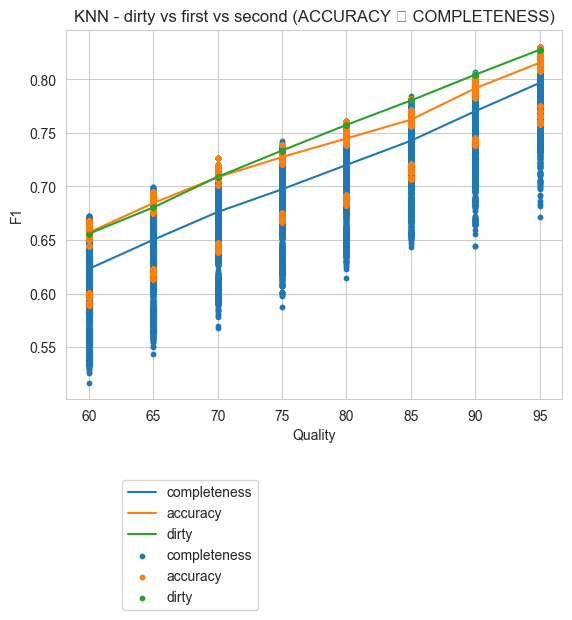

In [30]:
### accuracy --> completeness
plt.plot(perc_quality, get_median(sample_accuracy[['quality', 'DecisionTree_2']], 'DecisionTree_2'), label='completeness')
plt.plot(perc_quality, get_median(sample_accuracy[['quality', 'DecisionTree_1']], 'DecisionTree_1'), label='accuracy')
plt.plot(perc_quality, get_median(sample_accuracy[['quality', 'DecisionTree_dirty']], 'DecisionTree_dirty'), label='dirty')

plt.scatter(sample_accuracy.quality, sample_accuracy.DecisionTree_2, label='completeness', s=10)
plt.scatter(sample_accuracy.quality, sample_accuracy.DecisionTree_1, label='accuracy', s=10)
plt.scatter(sample_accuracy.quality, sample_accuracy.DecisionTree_dirty, label='dirty', s=10)

plt.title("KNN - dirty vs first vs second (ACCURACY ➞ COMPLETENESS)")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()

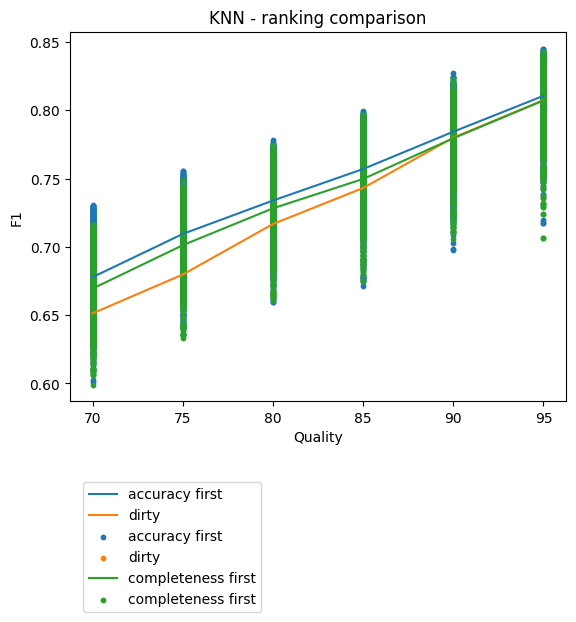

In [173]:
### confronto tra accuracy e completeness nel ranking
plt.plot(perc_quality, get_median(accuracy_first[['quality','KNN_2']],'KNN_2'), label='accuracy first')
plt.plot(perc_quality, get_median(sample_accuracy[['quality','KNN_dirty']],'KNN_dirty'), label='dirty')
plt.scatter(accuracy_first.quality, accuracy_first.KNN_2, label='accuracy first', s=10)
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_dirty, label='dirty', s=10)
plt.plot(perc_quality, get_median(sample_completeness[['quality','KNN_2']],'KNN_2'), label='completeness first')
plt.scatter(sample_completeness.quality, sample_completeness.KNN_2, label='completeness first', s=10)
plt.title("KNN - ranking comparison")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()

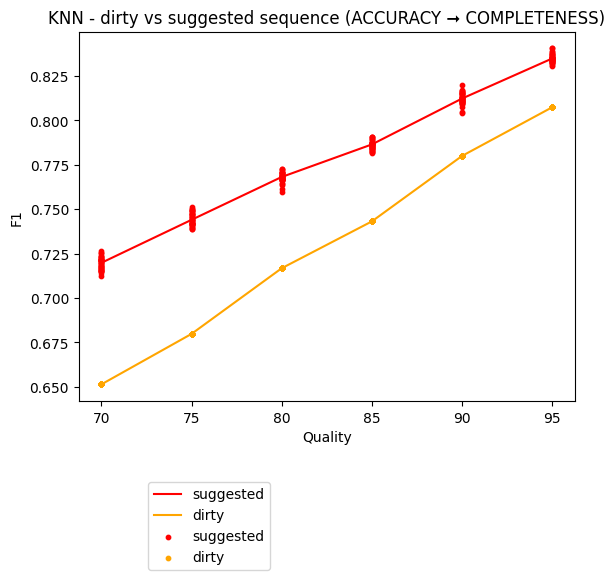

In [174]:
### confronto performance del sample suggested e di quello generale (cosa succede se miglioro nella combinazione di tecniche suggerite vs miglioro tutte le combinazioni)
plt.plot(perc_quality, get_median(suggested_accuracy[['quality','perf_2']],'perf_2'), label='suggested', color = 'red')
plt.plot(perc_quality, get_median(sample_accuracy[['quality','KNN_dirty']],'KNN_dirty'), label='dirty', color = 'orange')
plt.scatter(suggested_accuracy.quality, suggested_accuracy.perf_2, label='suggested', s=10, color = 'red')
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_dirty, label='dirty', s=10, color = 'orange')
plt.title("KNN - dirty vs suggested sequence (ACCURACY ➞ COMPLETENESS)")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()

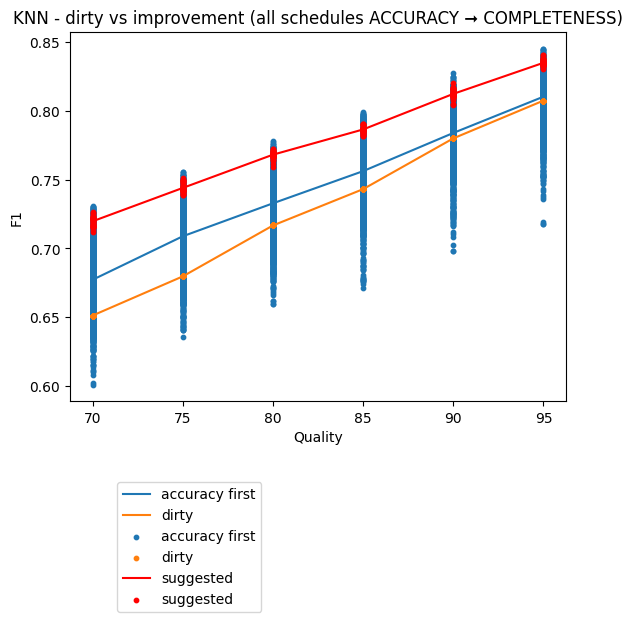

In [175]:
plt.plot(perc_quality, get_median(sample_accuracy[['quality','KNN_2']],'KNN_2'), label='accuracy first')
plt.plot(perc_quality, get_median(sample_accuracy[['quality','KNN_dirty']],'KNN_dirty'), label='dirty')
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_2, label='accuracy first', s=10)
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_dirty, label='dirty', s=10)
plt.plot(perc_quality, get_median(suggested_accuracy[['quality','perf_2']],'perf_2'), label='suggested', color = 'red')
plt.scatter(suggested_accuracy.quality, suggested_accuracy.perf_2, label='suggested', s=10, color = 'red')
plt.title("KNN - dirty vs improvement (all schedules ACCURACY ➞ COMPLETENESS)")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()

In [176]:
### analisi di cosa succede step by step (p_dirty, p1, p2) per accuracy e completeness separatamente

In [177]:
### accuracy --> completeness

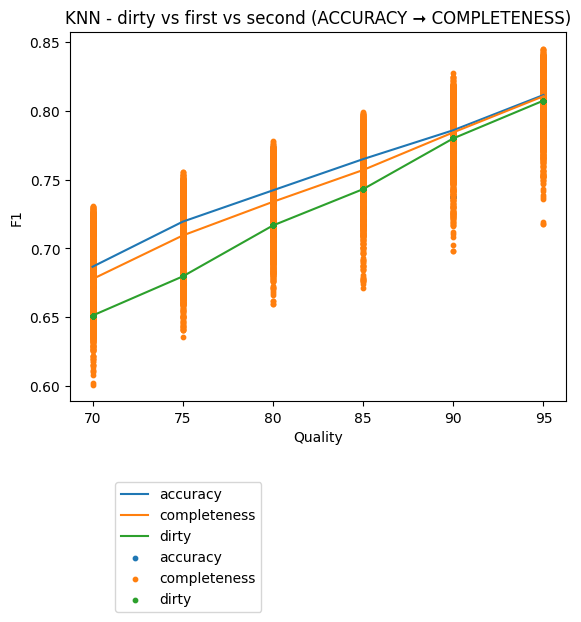

In [181]:
plt.plot(perc_quality, get_median(accuracy_first[['quality','KNN_1']],'KNN_1'), label='accuracy')
plt.plot(perc_quality, get_median(accuracy_first[['quality','KNN_2']],'KNN_2'), label='completeness')
plt.plot(perc_quality, get_median(sample_accuracy[['quality','KNN_dirty']],'KNN_dirty'), label='dirty')

plt.scatter(accuracy_first.quality, accuracy_first.KNN_1, label='accuracy', s=10)
plt.scatter(accuracy_first.quality, accuracy_first.KNN_2, label='completeness', s=10)
plt.scatter(sample_accuracy.quality, sample_accuracy.KNN_dirty, label='dirty', s=10)

plt.title("KNN - dirty vs first vs second (ACCURACY ➞ COMPLETENESS)")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()

In [ ]:
### completeness --> accuracy
plt.plot(perc_quality, get_median(sample_completeness[['quality', 'KNN_2']], 'KNN_2'), label='accuracy')
plt.plot(perc_quality, get_median(sample_completeness[['quality', 'KNN_1']], 'KNN_1'), label='completeness')
plt.plot(perc_quality, get_median(sample_completeness[['quality', 'KNN_dirty']], 'KNN_dirty'), label='dirty')

plt.scatter(sample_completeness.quality, sample_completeness.KNN_2, label='accuracy', s=10)
plt.scatter(sample_completeness.quality, sample_completeness.KNN_1, label='completeness', s=10)
plt.scatter(sample_completeness.quality, sample_completeness.KNN_dirty, label='dirty', s=10)

plt.title("KNN - dirty vs first vs second (COMPLETENESS ➞ ACCURACY)")
plt.xlabel("Quality")
plt.ylabel("F1")
plt.legend(bbox_to_anchor=(0.4, -0.2))
#plt.ylim([0.85,1])
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
plt.show()

In [194]:
### distribution plots

In [195]:
import seaborn as sns

In [197]:
suggested = pd.read_csv('compiled_schedule_suggested.csv')
sample = pd.read_csv('compiled_sample_schedule.csv')
sample = sample[sample.quality > 69]
perc_quality = [70,75,80,85,90,95]
suggested = suggested[suggested.algorithm == 'KNN']

In [207]:
temp_suggested = pd.DataFrame(suggested_accuracy[['dimension_1', 'quality', 'perf_dirty', 'perf_1','perf_2']])
temp_suggested.columns = ['dimension_1', 'quality', 'KNN_dirty','KNN_1','KNN_2']
temp_suggested['suggested'] = 'YES'
sample['suggested'] = 'NO'
all = pd.concat([temp_suggested, sample[['dimension_1', 'quality', 'KNN_dirty','KNN_1','KNN_2', 'suggested']]])

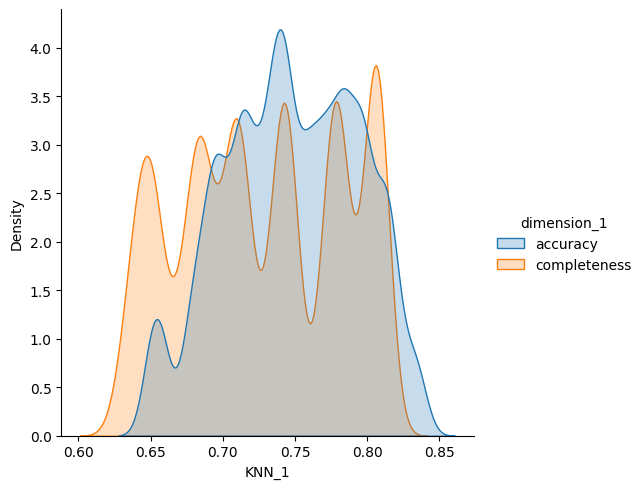

In [208]:
### distribuzione rankings x percentuale di qualità
sns.displot(all, x="KNN_1", hue="dimension_1", kind="kde", fill=True)
plt.title("KNN - completeness first vs accuracy first")
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')

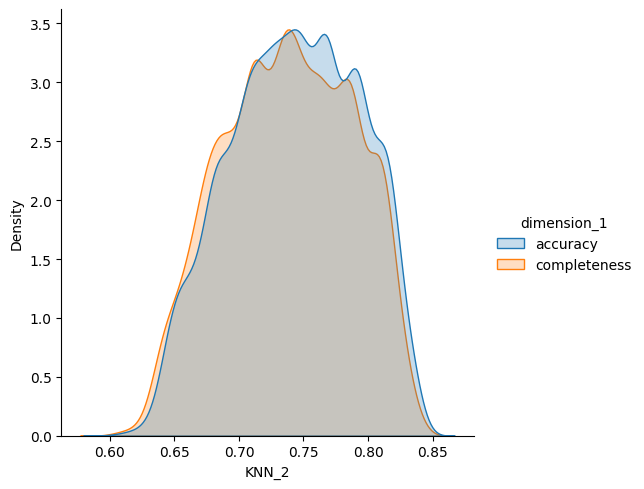

In [209]:
### distribuzione rankings x percentuale di qualità
sns.displot(all, x="KNN_2", hue="dimension_1", kind="kde", fill=True)
plt.title("KNN - (ACCURACY ➞ COMPLETENESS) vs (COMPLETENESS ➞ ACCURACY)")
#plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')

In [ ]:
### differenza distribuzioni tra suggested e tutte le altre combinaizoni
sns.set_theme(style="ticks", palette="deep")
sns.displot(all[all.suggested == 'NO'], x="KNN_1", kde=True)
plt.title('all schedules first dimension')
plt.xlim([0.6,0.85])
sns.displot(all[all.suggested == 'YES'], x="KNN_1", kde=True)
plt.xlim([0.6,0.85])
plt.title('suggested schedule first dimension')

In [ ]:
### differenza distribuzioni tra suggested e tutte le altre combinaizoni
sns.set_theme(style="ticks", palette="deep")
sns.displot(all[all.suggested == 'NO'], x="KNN_2", kde=True)
plt.title('all schedules')
plt.xlim([0.6,0.85])
sns.displot(all[all.suggested == 'YES'], x="KNN_2", kde=True)
plt.xlim([0.6,0.85])
plt.title('suggested schedule')

In [ ]:
### stessa cosa solo per accuracy --> completeness
### differenza distribuzioni tra suggested e tutte le altre combinaizoni

all_accuracy = all[all.dimension_1 == 'accuracy']

sns.set_theme(style="ticks", palette="deep")
sns.displot(all_accuracy[all_accuracy.suggested == 'NO'], x="KNN_1", kde=True)
plt.title('all schedules first dimension (only accuracy -> completeness)')
plt.xlim([0.6,0.85])
sns.displot(all_accuracy[all_accuracy.suggested == 'YES'], x="KNN_1", kde=True)
plt.xlim([0.6,0.85])
plt.title('suggested schedule first dimension (only accuracy -> completeness)')

### differenza distribuzioni tra suggested e tutte le altre combinaizoni
sns.set_theme(style="ticks", palette="deep")
sns.displot(all_accuracy[all_accuracy.suggested == 'NO'], x="KNN_2", kde=True)
plt.title('all schedules (only accuracy -> completeness)')
plt.xlim([0.6,0.85])
sns.displot(all_accuracy[all_accuracy.suggested == 'YES'], x="KNN_2", kde=True)
plt.xlim([0.6,0.85])
plt.title('suggested schedule (only accuracy -> completeness)')

In [ ]:
### per singola percentuale di qualità -- distribuzioni

In [ ]:
### distribuzione rankings x percentuale di qualità

for q in perc_quality:

    all = all[all.quality == q]

    ### distribuzione rankings x percentuale di qualità
    sns.displot(all, x="KNN_1", hue="dimension_1", kind="kde", fill=True)
    plt.title("KNN - completeness first vs accuracy first "+str(q))
    #plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
    ### distribuzione rankings x percentuale di qualità
    sns.displot(all, x="KNN_2", hue="dimension_1", kind="kde", fill=True)
    plt.title("KNN - (ACCURACY ➞ COMPLETENESS) vs (COMPLETENESS ➞ ACCURACY) "+str(q))
    #plt.savefig("/Users/camillasancricca/Desktop/" + "model_1_HC" + ".pdf", bbox_inches='tight')
    ### differenza distribuzioni tra suggested e tutte le altre combinaizoni
    sns.set_theme(style="ticks", palette="deep")
    sns.displot(all[all.suggested == 'NO'], x="KNN_1", kde=True)
    plt.title('all schedules first dimension '+str(q))
    plt.xlim([0.6, 0.85])
    sns.displot(all[all.suggested == 'YES'], x="KNN_1", kde=True)
    plt.xlim([0.6, 0.85])
    plt.title('suggested schedule first dimension '+str(q))
    ### differenza distribuzioni tra suggested e tutte le altre combinaizoni
    sns.set_theme(style="ticks", palette="deep")
    sns.displot(all[all.suggested == 'NO'], x="KNN_2", kde=True)
    plt.title('all schedules '+str(q))
    plt.xlim([0.6, 0.85])
    sns.displot(all[all.suggested == 'YES'], x="KNN_2", kde=True)
    plt.xlim([0.6, 0.85])
    plt.title('suggested schedule '+str(q))
    ### stessa cosa solo per accuracy --> completeness
    ### differenza distribuzioni tra suggested e tutte le altre combinaizoni

    all_accuracy = all[all.dimension_1 == 'accuracy']

    sns.set_theme(style="ticks", palette="deep")
    sns.displot(all_accuracy[all_accuracy.suggested == 'NO'], x="KNN_1", kde=True)
    plt.title('all schedules first dimension (only accuracy -> completeness) '+str(q))
    plt.xlim([0.6, 0.85])
    sns.displot(all_accuracy[all_accuracy.suggested == 'YES'], x="KNN_1", kde=True)
    plt.xlim([0.6, 0.85])
    plt.title('suggested schedule first dimension (only accuracy -> completeness) '+str(q))

    ### differenza distribuzioni tra suggested e tutte le altre combinaizoni
    sns.set_theme(style="ticks", palette="deep")
    sns.displot(all_accuracy[all_accuracy.suggested == 'NO'], x="KNN_2", kde=True)
    plt.title('all schedules (only accuracy -> completeness) '+str(q))
    plt.xlim([0.6, 0.85])
    sns.displot(all_accuracy[all_accuracy.suggested == 'YES'], x="KNN_2", kde=True)
    plt.xlim([0.6, 0.85])
    plt.title('suggested schedule (only accuracy -> completeness) '+str(q))

In [ ]:
### TODO: fare la generazione di queste plot in modo automatico per ogni algoritmo
### TODO: le distribuzioni sia totali (tutte le % qualità insieme) che per percentuale di qualità

In [ ]:
### controllare di non sforare mai le performance del dataset originale

In [76]:
### altre analisi: si prendono le performance più alte di tutte e si guardano i pattern

### plot finali: (marcare sempre performance originali)
### prendere performance più alte (1%, 2%?) e fare dei confronti
### cercare di capire quali computazioni si possono escludere (prendere performance più basse e capire come fare delle euristiche)